<a href="https://colab.research.google.com/github/ryan1234814/rarandom-password-generator/blob/main/animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense,Dropout


In [7]:
species_data={
    "Species":[f"Species_{i}" for i in range(1,501)],
    "Population_Size":np.random.randint(50,10000,500),
    "Habitat_Type":np.random.choice(["Forest","Grassland","Wetland","Desert","Mountain"],500),
    "Threat_Level":np.random.choice(["Low","Medium","High"],500),
    "Conservation_Efforts":np.random.choice(["Poor","Moderate","Good","Excellent"],500),
    "Extinction_Risk": np.random.choice(["Low", "Medium", "High"], 500)

}
df=pd.DataFrame(species_data)
df.to_csv("species_data.csv",index=False)
df

,Species,Population_Size,Habitat_Type,Threat_Level,Conservation_Efforts,Extinction_Risk
0,Species_1,1169,Forest,Low,Excellent,Medium
1,Species_2,7946,Grassland,High,Excellent,High
2,Species_3,8444,Grassland,Medium,Excellent,Medium
3,Species_4,6970,Forest,Medium,Excellent,Medium
4,Species_5,752,Grassland,Low,Moderate,High
...,...,...,...,...,...,...
495,Species_496,9218,Forest,High,Moderate,Medium
496,Species_497,6516,Forest,Low,Moderate,Low
497,Species_498,6733,Wetland,Low,Excellent,High
498,Species_499,4169,Forest,Medium,Moderate,Medium


In [8]:
df=pd.read_csv("species_data.csv")
print("dataset info")
print(df.info())
print("dataset description")
print(df.describe())

dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Species               500 non-null    object
 1   Population_Size       500 non-null    int64 
 2   Habitat_Type          500 non-null    object
 3   Threat_Level          500 non-null    object
 4   Conservation_Efforts  500 non-null    object
 5   Extinction_Risk       500 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.6+ KB
None
dataset description
       Population_Size
count       500.000000
mean       5037.274000
std        2893.753684
min          68.000000
25%        2617.500000
50%        5092.500000
75%        7434.000000
max        9997.000000


In [10]:
le=LabelEncoder()
for col in ["Habitat_Type","Threat_Level","Conservation_Efforts","Extinction_Risk"]:
  df[col]=le.fit_transform(df[col])
X=df.drop(columns=["Species","Extinction_Risk"])
y=df["Extinction_Risk"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)



In [11]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42,max_depth=10)
rf_model.fit(X_train,y_train)
rf_preds=rf_model.predict(X_test)
rf_accuracy=accuracy_score(y_test,rf_preds)
print("Random Forest Accuracy:",rf_accuracy)
print(classification_report(y_test,rf_preds))

Random Forest Accuracy: 0.32666666666666666
              precision    recall  f1-score   support

           0       0.30      0.33      0.31        49
           1       0.36      0.35      0.35        55
           2       0.33      0.30      0.31        46

    accuracy                           0.33       150
   macro avg       0.33      0.33      0.33       150
weighted avg       0.33      0.33      0.33       150



In [18]:
rf_results=pd.DataFrame({
    "Species":df["Species"].iloc[X_test.index],
    "Actual_Extinction_Risk":y_test,
    "Predicted_Extinction_Risk":rf_preds
})
rf_results.to_csv("random_forest_results.csv",index=False)
rf_results
print("random forest predictions saved as random_forest_results.csv")



random forest predictions saved as random_forest_results.csv


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

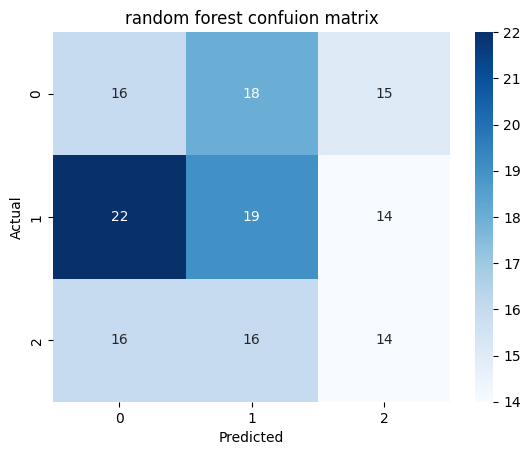

In [19]:
sns.heatmap(confusion_matrix(y_test,rf_preds),annot=True,cmap="Blues",fmt="d")
plt.title("random forest confuion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
